# Uebung 1b

## Aufgabe 3

Laden sie ein einzelnes Mosaik von swissimage herunter. Dieses kann mit dem Web-Interface auf https://www.swisstopo.admin.ch/de/geodata/images/ortho/swissimage10.html gefunden werden.
(durch klicken auf "alle links exportieren"). Speichern Sie dieses Bild im "daten" Ordner.

Beispiel:

```url = "https://data.geo.admin.ch/ch.swisstopo.swissimage-dop10/swissimage-dop10_2018_2615-1264/swissimage-dop10_2018_2615-1264_0.1_2056.tif"```


a) Bestimmen Sie unter verwendung von Rasterio:

    1. Die Auflösung des Bildes in Pixel
    2. Wieviele Quadratmeter werden in diesem Bild abgedeckt? (aus Metadaten berechnen)
    3. Die LV95 Koordinaten von den Eckpunkten und dem Mittelpunkt des Bildes
    



In [2]:
import geoutils

url = "https://data.geo.admin.ch/ch.swisstopo.swissimage-dop10/swissimage-dop10_2019_2744-1253/swissimage-dop10_2019_2744-1253_0.1_2056.tif"

geoutils.download(url, "daten/swiss_mosaik.tif")


100% done 	[****************************************************************************************************]


In [3]:
import rasterio

In [48]:
mosaik = rasterio.open('daten/swiss_mosaik.tif')

In [49]:
mosaik.width

10000

In [50]:
mosaik.height

10000

In [51]:
# number of pixels
mosaik.width * mosaik.height

100000000

In [52]:
mosaik.bounds

BoundingBox(left=2744000.0, bottom=1253000.0, right=2745000.0, top=1254000.0)

In [53]:
mosaik.res

(0.1, 0.1)

In [54]:
mosaik.shape

(10000, 10000)

In [55]:
mosaik.count

3

In [56]:
# Koordinaten obere linke Ecke
oben_links = mosaik.transform * (0, 0)
oben_links

(2744000.0, 1254000.0)

In [57]:
# Koordinaten untere rechte Ecke
unten_rechts = mosaik.transform * (mosaik.width, mosaik.height)
unten_rechts

(2745000.0, 1253000.0)

In [58]:
# Mittelpunkt des Bildes
mitte = ((oben_links[0]+unten_rechts[0])/2,(oben_links[1]+unten_rechts[1])/2)
mitte

(2744500.0, 1253500.0)

In [59]:
# abgebildete Quadratmeter
abs((oben_links[0]-unten_rechts[0])*(oben_links[1]-unten_rechts[1]))

1000000.0

In [60]:
mosaik.crs

CRS.from_epsg(2056)

In [ ]:
# transform from one epsg to another with
from pyproj import Transformer

In [16]:
import matplotlib.pyplot as plt
import numpy as np


In [37]:
px,py = ~mosaik.transform * mitte
print(px,py)

5000.0 5000.0


In [62]:
point = (9.354359033062618, 47.42029580807323)
mosaik_WGS = mosaik
#mosaik_WGS.crs.from_epsg(2056)
mosaik_WGS.crs.to_epsg()
ppx,ppy = ~mosaik_WGS.transform * point
print(ppx,ppy)

-27439906.45640967 12539525.79704192


b) Plotten Sie das Bild in Jupyter Lab


In [18]:
r = mosaik.read(1)
g = mosaik.read(2)
b = mosaik.read(3)

In [19]:
rgb = np.dstack((r,g,b))

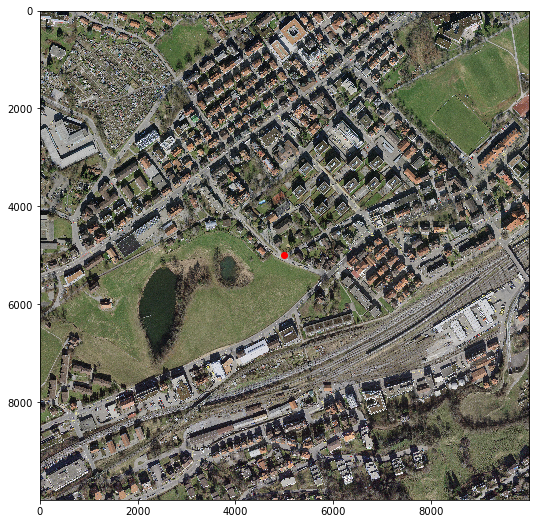

In [42]:
fig, ax = plt.subplots(figsize=(15,9))
ax.imshow(rgb, interpolation='nearest')
ax.plot(px,py, 'ro');
#ax.plot(ppx,ppy,'ro');